In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [10]:
# import cv2
# img = cv2.imread('liton.jpg')
# img = cv2.resize(img, (300, 300))
# cv2.imwrite('liton_resized.jpg', img)

True

In [ ]:
cd drive/MyDrive/product_recommender_system

[Errno 2] No such file or directory: 'drive/MyDrive/product_recommender_system'
/content/drive/MyDrive/product_recommender_system


In [ ]:
import os
import glob
import pickle
import numpy as np
from scipy.spatial.distance import cosine
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import Input
from matplotlib import pyplot as plt

In [ ]:
def process_inputs(img_path):
  img = image.load_img(img_path, target_size=(100, 100))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  return x

In [ ]:
model = VGG16(weights='imagenet', input_tensor=Input(shape=(100,100,3)), include_top=False)

In [ ]:
data_dir = 'dataset'
features = pickle.load(open('features.pickle', 'rb'))
images = glob.glob(data_dir + '/*/*/*/*.jpg')
images.sort()

In [ ]:
image_paths = list(features.keys())
features = list(features.values())
features = [feature/np.linalg.norm(feature) for feature in features]
features = np.array(features)
len(features)

3534

In [ ]:
curr_img_feat = model.predict(process_inputs(images[2500]))
curr_img_feat = curr_img_feat.flatten()/np.linalg.norm(curr_img_feat)

In [ ]:
dists = np.linalg.norm(features-curr_img_feat, axis=1)

In [ ]:
ids = np.argsort(dists).tolist()

Score :  0.64747405


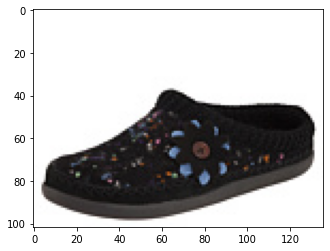

Score :  0.7465275


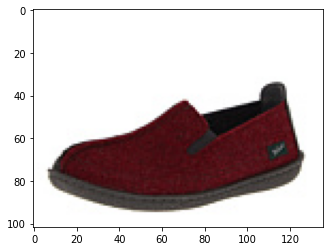

Score :  0.7481091


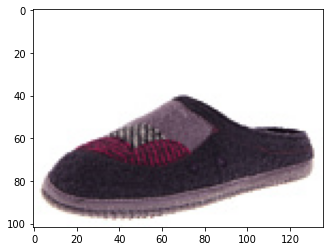

Score :  0.75157154


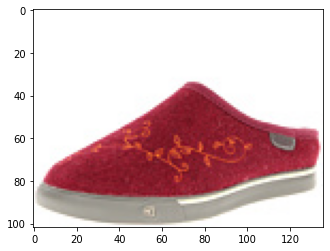

Score :  0.76426584


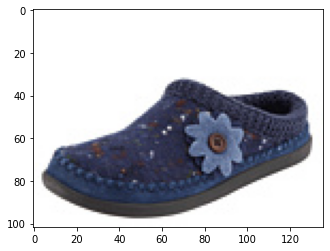

Score :  0.7684772


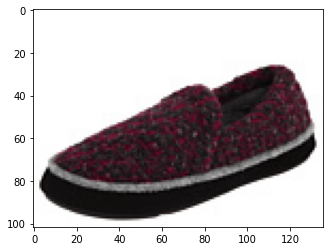

Score :  0.7804158


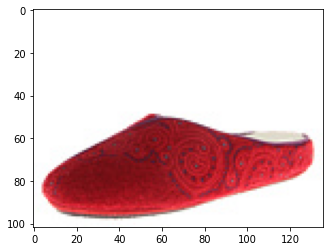

Score :  0.7892464


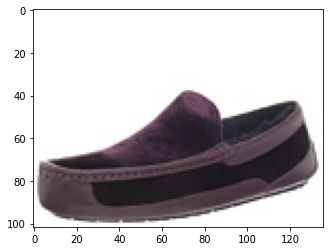

Score :  0.7930856


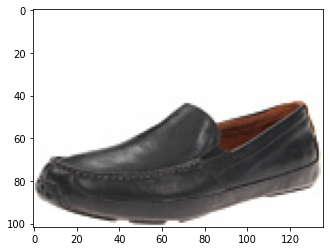

In [ ]:
import cv2
%matplotlib inline
for id in ids[1:10]:
  img = cv2.imread(image_paths[id])
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  print("Score : ", dists[id])
  plt.imshow(img)
  plt.show()

In [ ]:
for root, folder, file_names in os.walk(data_dir):
  print(root, folder)
  print(file_names)

dataset ['Slippers', 'Boots']
[]
dataset/Slippers ['Boot', 'Slipper Heels', 'Slipper Flats']
[]
dataset/Slippers/Boot ['Old Friend', 'Foamtreads', 'Baffin', 'Minnetonka', 'UGG Kids', 'Acorn']
[]
dataset/Slippers/Boot/Old Friend []
['7575257.6.jpg', '7575257.8.jpg', '7575257.20.jpg', '7575257.3.jpg']
dataset/Slippers/Boot/Foamtreads []
['7299259.62266.jpg', '7464546.68.jpg', '7464546.4469.jpg']
dataset/Slippers/Boot/Baffin []
['7486138.135957.jpg', '7486138.359.jpg', '7486138.9.jpg']
dataset/Slippers/Boot/Minnetonka []
['101404.231.jpg']
dataset/Slippers/Boot/UGG Kids []
['7466457.621.jpg']
dataset/Slippers/Boot/Acorn []
['7149924.27915.jpg', '7253704.1761.jpg']
dataset/Slippers/Slipper Heels ['L.B. Evans', 'Daniel Green']
[]
dataset/Slippers/Slipper Heels/L.B. Evans []
['7590239.72.jpg', '7590239.255.jpg']
dataset/Slippers/Slipper Heels/Daniel Green []
['105772.552.jpg', '105772.172.jpg', '105772.72.jpg', '105772.570.jpg', '105772.14.jpg', '105772.385.jpg', '105772.46867.jpg', '117456.